<a href="https://colab.research.google.com/github/rijo-0309/NITTC_guraduation_research/blob/main/numerical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Heun(f, h, start, end, x0):
    #dx/dt=f(t,x)->x_n+1 = x_n + h*f(t_n, x_n)
    Range = end - start
    N = int(Range/h)
    t = np.linspace(start, end, N)
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        k1=f(t[n], x[n])
        k2=f(t[n]+h, x[n]+h*k1)
        x[n+1] = x[n] + 0.5*h*(k1+k2)
    return t, x

def RK(f, h, start, end, x0):
    #dx/dt=f(t,x)->x_n+1 = x_n + h*f(t_n, x_n)
    Range = end - start
    N = int(Range/h)
    t = np.linspace(start, end, N)
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
        k1=f(t[n], x[n])
        k2=f(t[n]+h*0.5, x[n]+0.5*h*k1)
        k3=f(t[n]+h*0.5, x[n]+0.5*h*k2)
        k4=f(t[n]+h, x[n]+h*k3)
        x[n+1] = x[n] + h/6.*(k1+2*k2+2*k3+k4)
    return t, x

In [ ]:
def func(t, x):
  return x

In [ ]:
tH21, xH21 = Heun(func, 0.01, 0, 10, 1)
tR21, xR21 = RK(func, 0.01, 0, 10, 1)
plt.show()

In [ ]:
gamma = 0.01

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.1
def f(u, v):
  return u*(1-u)*(u-0.2)-v
def g(u, v):
  return u-gamma*v


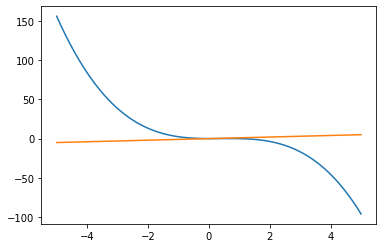

In [ ]:
u = np.linspace(-5, 5, 10000)
plt.plot(u, u*(1-u)*(u-0.2))
plt.plot(u, u/gamma)
plt.show()

In [ ]:
def RK_ndim(f, h, start, end, x0):
    #dx/dt=f(t,x)->x_n+1 = x_n + h*f(t_n, x_n)
    dim = x0.size
    Range = end - start
    N = int(Range/h)
    t = np.linspace(start, end, N)
    x = np.zeros((N, dim))
    x[0] = x0
    for n in range(N-1):
        k1=f(x[n])
        k2=f(x[n]+0.5*h*k1)
        k3=f(x[n]+0.5*h*k2)
        k4=f(x[n]+h*k3)
        x[n+1] = x[n] + h/6.*(k1+2*k2+2*k3+k4)
        #print(x[n+1])
    return t, x

In [ ]:
def F(u):
  #u is vector, F: R^n->R^n
  return np.array([f(u[0], u[1])/0.001, g(u[0], u[1])])

In [ ]:
u0 = np.array([0.22, 0.0])
t, x = RK_ndim(F, 0.001, 0, 2, u0)

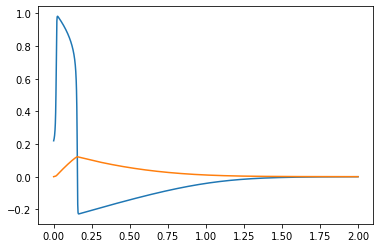

In [ ]:
plt.plot(t, x)
plt.show()

In [ ]:
def G(x):
  #x is 4dim vector, G(x) is so too
  ret = np.zeros(4)
  ret[0] = x[2]
  ret[1] = x[3]
  ret[2] = -x[0]/(x[0]**2+x[1]**2)**1.5
  ret[3] = -x[1]/(x[0]**2+x[1]**2)**1.5
  return ret

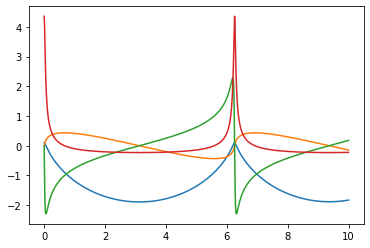

In [ ]:
e = 0.9
x0 = np.array([1-e, 0, 0, np.sqrt((1+e)/(1-e))])

t, x = RK_ndim(G, 0.01, 0, 10, x0)
plt.plot(t, x)
plt.show()

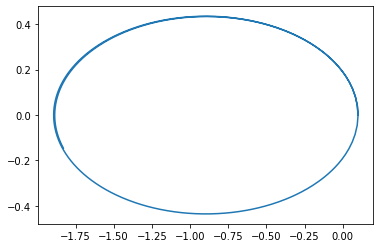

In [ ]:
plt.plot(x[:, 0], x[:, 1])
plt.show()

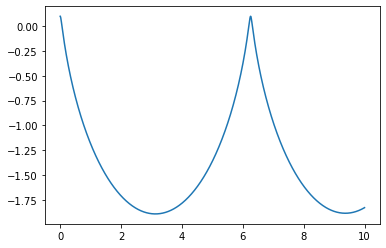

In [ ]:
plt.plot(t, x[:, 0])

In [ ]:
A = np.array([[2, 1, 0],
              [0, 2, 0],
              [0, 0, 3]])
b = np.array([1, 1, 1])
x = np.linalg.solve(A, b)

In [ ]:
x

array([0.25      , 0.5       , 0.33333333])

In [ ]:
A@x

array([1., 1., 1.])

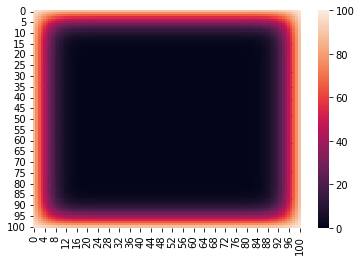

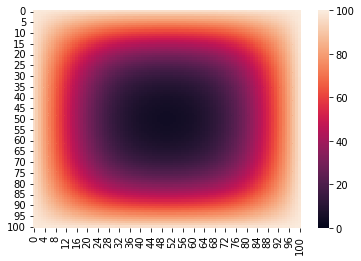

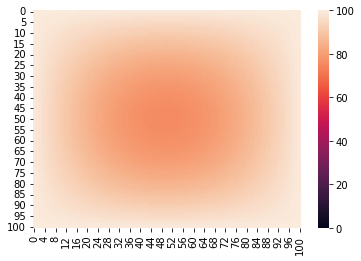

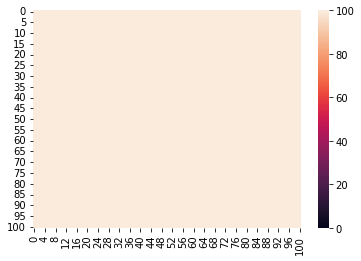

In [ ]:
#二次元拡散方程式のADI法による数値計算

# -*- coding: utf-8 -*-
"""
交互方向陰解法による2次元の熱拡散方程式の計算
"""

import numpy as np
import numpy.matlib
from decimal import Decimal, ROUND_HALF_UP
import scipy.sparse.linalg as spla
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time


dtnum = 5001 #時間をいくつに分割して計算するか 一の位を1とした方が良い 時刻tのfor文の終わりの数字に関係あり
dxnum = 101 #xとyをいくつに分割して計算するか
dynum = 101

thick = 10 #x方向の大きさ
width = 10 #y方向の大きさ
time_calc = 500 #計算する時間
beta = 0.1 #上の式中ではラムダ　温度拡散率 lambda = 熱伝導率/(密度*比熱)

"""計算準備"""
#空の解を用意
solution_k1 = np.zeros([dxnum,dynum])
solution_k2 = np.zeros([dxnum,dynum]) #solution_k2の初期値が初期条件になる


#境界条件
irr_boundary = 100 #表面の境界条件 (0,t)における温度 
rear_boundary = 100 #裏面と反対側の境界条件　(x,t)における温度 0を基準となる温度とした
side_0 = 100 #y=0の温度
side_y = 100 #y=0とは反対側の境界の温度

dt = time_calc / (dtnum - 1)
dx = thick / (dxnum - 1)
dy = width / (dynum - 1)

d = -(2+(dx**2)/(beta*dt))
B = (2*((dx/dy)**2)-((dx**2)/(beta*dt)))

e = -(2+(dy**2)/(beta*dt))
C = (2*((dy/dx)**2)-((dy**2)/(beta*dt)))


"""Ax=bのAを用意"""
a_matrix_1 = np.identity(dxnum) * d \
            + np.eye(dxnum, k=1) \
            + np.eye(dxnum, k=-1)

a_matrix_2 = np.identity(dynum) * e \
            + np.eye(dynum, k=1) \
            + np.eye(dynum, k=-1)      

#疎行列を格納　csr方式
a_matrix_csr1 = csr_matrix(a_matrix_1)
a_matrix_csr2 = csr_matrix(a_matrix_2)


#ADI法ではk+1時刻とk+2時刻を計算するので、for文の回数は半分になる
number = Decimal(str(dtnum/2)).quantize(Decimal('0'), rounding=ROUND_HALF_UP)
number = int(number)

solution = np.zeros([dxnum,dynum,number]) #解を代入する行列を作成

#temp_temperature_arrayは、ずれた列を作成して、足すためのもの
temp_temperature_array1 = np.zeros([dxnum,dynum+2])
temp_temperature_array1[:,0] = side_0
temp_temperature_array1[:,-1] = side_y

temp_temperature_array2 = np.zeros([dxnum+2,dynum])
temp_temperature_array2[0,:] = irr_boundary
temp_temperature_array2[-1,:] = rear_boundary

#ADI法の計算
for k in range(number): #時刻tについて
    for j in range(dynum):#xを計算し、yの数繰り返すことで、時刻k+1のTijを計算       
        temp_temperature_array1[:,1:dynum+1] = solution_k2
        b_array_1 = B * temp_temperature_array1[:,j+1] \
            - ((dx/dy)**2) * (temp_temperature_array1[:,j] + temp_temperature_array1[:,j+2])

        # bの最初と最後に境界条件
        b_array_1[0] -= irr_boundary
        b_array_1[-1] -= rear_boundary

        #解を求める
        temperature_solve1 = spla.dsolve.spsolve(a_matrix_csr1, b_array_1)#xについての解
        solution_k1[:,j] = temperature_solve1

    for i in range(dxnum):#yを計算し、xの数繰り返すことで、時刻k+2のTijを計算
        temp_temperature_array2[1:dxnum+1,:] = solution_k1
        b_array_2 = C * temp_temperature_array2[i+1,:] \
            - ((dy/dx)**2) * (temp_temperature_array2[i,:] + temp_temperature_array2[i+2,:])

        # bの最初と最後に境界条件
        b_array_2[0] -= side_0
        b_array_2[-1] -= side_y

        #解を求める
        temperature_solve2 = spla.dsolve.spsolve(a_matrix_csr2, b_array_2)#yについての解
        solution_k2[i,:] = temperature_solve2
    solution[:,:,k] = solution_k2


ax = sns.heatmap(solution[:,:,10], linewidth=0, vmin=0, vmax=100)
plt.show()

ax = sns.heatmap(solution[:,:,100], linewidth=0, vmin=0, vmax=100)
plt.show()

ax = sns.heatmap(solution[:,:,500], linewidth=0, vmin=0, vmax=100)
plt.show()

ax = sns.heatmap(solution[:,:,2000], linewidth=0, vmin=0, vmax=100)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


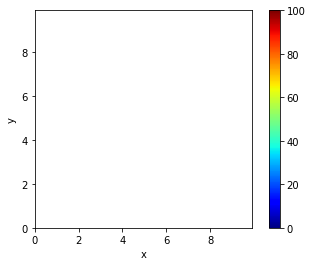

In [ ]:
dt = 0.01
D = 0.5
dx = 0.1
dy = 0.1
Ns = 100
Nt = 500
L = dx * Ns

C = dt*D/(2*dx*dx)
u = np.zeros((Nt, Ns, Ns))

#計算行列
A = np.eye(Ns-2)*(1+2*C) - np.eye(Ns-2, k=1)*C - np.eye(Ns-2, k=-1)*C

u[0, :, :] = np.zeros((Ns, Ns))
#初期条件の設定
for i in range(Ns):
  u[0,i, 0] = 100
  u[0, i, Ns-1] = 100
  u[0, 0, i] = 100
  u[0, Ns-1, i] = 100
#境界条件の設定
for n in range(Nt):
  u[n,i, 0] = 100
  u[n, i, Ns-1] = 100
  u[n, 0, i] = 100
  u[n, Ns-1, i] = 100

#解を求める
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  for j in range(1, Ns-1):
    b = (1-2*C)*u[n, 1: Ns-1, j] + C*(u[n, 1: Ns-1, j+1] + u[n, 1: Ns-1, j-1])
    b[0] += C*100
    b[Ns-3] += C*100
    u[n+1, 1:Ns-1, j] = dsolve.spsolve(A, b)

  for i in range(1, Ns-1):
    b = (1-2*C)*u[n+1, i, 1:Ns-1] + C*(u[n, i+1, 1:Ns-1] + u[n, i-1, 1:Ns-1])
    b[0] += C*100
    b[Ns-3] += C*100
    u[n+1, i, 1:Ns-1] = dsolve.spsolve(A, b)

#可視化
import matplotlib.animation as animation
ims = []
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

gx = np.arange(Ns+1)*dx
gy = np.arange(Ns+1)*dy
X, Y = np.meshgrid(gx, gy)

for n in range(Nt):
  im_contour = ax.pcolormesh(X, Y, u[n, :, :].T, cmap='jet', vmin=0.0, vmax=100.0, shading='gouraud')
  im_time = ax.text(0, 10.05, 'Time = {0:8.1f}[s]'.format(n*dt))
  ims.append([im_contour] + [im_time])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
fig.colorbar(im_contour)
anm = animation.ArtistAnimation(fig, ims, interval=50)
anm.save('animatin.gif', writer='pillow')
plt.show()

In [ ]:
a = np.arange(10)
a[1:4]

array([1, 2, 3])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 1.0
eps = 0.001
a = 0.125
Du = 1.0
Dv = 0.1
L = 20.0
T = 5.0
#Neumann境界条件(断熱) FitzHugh-Nagumo eq.
def f(u, v):
  return (u*(1.0-u)*(u-a)-v)/eps
def g(u, v):
  return -gamma*v

dx = 0.1
dt = 0.01
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(dx*dx)
u = np.zeros((Nt, Ns+1))
u[0, :] = 0.01
v = np.zeros((Nt, Ns+1))
v[0, :] = 0.01

#計算行列
Au = np.eye(Ns+1)*(1+2*r*Du) - np.eye(Ns+1, k=1)*(r*Du)- np.eye(Ns+1, k=-1)*(r*Du)
Au[0, 0] *= 0.5
Au[Ns, Ns] *= 0.5
Av = np.eye(Ns+1)*(1+2*r*Dv) - np.eye(Ns+1, k=1)*(r*Dv)- np.eye(Ns+1, k=-1)*(r*Dv)
Av[0, 0] *= 0.5
Av[Ns, Ns] *= 0.5

#解を求める
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  bu = u[n, :] + dt*f(u[n, :], v[n, :])
  bu[0] *= 0.5
  bu[Ns] *= 0.5
  u[n+1, :] = dsolve.spsolve(Au, bu)

  bv = v[n, :] + dt*g(u[n, :], v[n, :])
  bv[0] *= 0.5
  bv[Ns] *= 0.5
  v[n+1, :] = dsolve.spsolve(Av, bv)
  

#可視化
import matplotlib.animation as animation
ims = []

fig = plt.figure()
ax = fig.add_subplot(111)
gx = np.arange(Ns+1)*dx

for n in range(Nt):
  im1 = ax.plot(gx, u[n, :], color="red", label="u")
  im2 = ax.plot(gx, v[n, :], color="green", label="v")
  im_time = ax.text(0, 5.5, 'Time = {0:8.1f}[s]'.format(n*dt))
  ims.append(im1 + im2 +[im_time])

ax.set_xlabel('x')
ax.set_ylabel('u, v')
ax.legend(loc='lower left')
#ax.set_aspect('equal')
#fig.colorbar(im_contour)
anm = animation.ArtistAnimation(fig, ims, interval=40)
anm.save("FitzHugh-Nagumo1dim.gif", writer="pillow")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa135a49c20> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa135a54290> (for post_execute):


KeyboardInterrupt: ignored

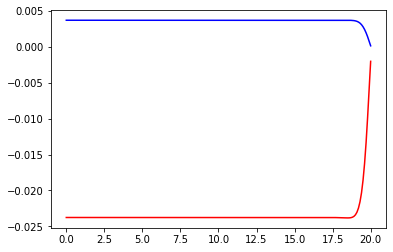

In [ ]:
plt.plot(gx, u[100, :], color="red")
plt.plot(gx, v[100, :], color="blue")
plt.show()

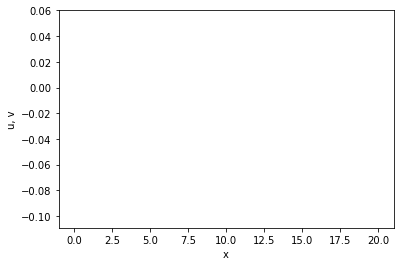

In [ ]:
#可視化
import matplotlib.animation as animation
ims = []

fig = plt.figure()
ax = fig.add_subplot(111)
gx = np.arange(Ns+1)*dx

for n in range(Nt):
  im1 = ax.plot(gx, u[n, :], color="red")
  im2 = ax.plot(gx, v[n, :], color="green")
  #im_time = ax.text(0, 5.5, 'Time = {0:8.1f}[s]'.format(n*dt))
  ims.append(im1 + im2)

ax.set_xlabel('x')
ax.set_ylabel('u, v')
#ax.legend(loc='lower left')
#ax.set_aspect('equal')
#fig.colorbar(im_contour)
anm = animation.ArtistAnimation(fig, ims, interval=40)
anm.save("FitzHugh-Nagumo1dim.gif", writer="pillow")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


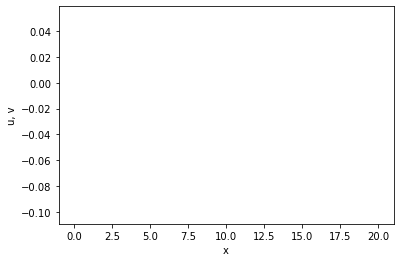

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 1.0
eps = 0.001
a = 0.125
Du = 1.0
Dv = 0.1
L = 20.0
T = 5.0
#Neumann境界条件(断熱) FitzHugh-Nagumo eq.
def f(u, v):
  return (u*(1.0-u)*(u-a)-v)/eps
def g(u, v):
  return u-gamma*v

dx = 0.1
dt = 0.01
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(dx*dx)
u = np.zeros((Nt, Ns+1))
u[0, :] = 0.01
v = np.zeros((Nt, Ns+1))
v[0, :] = 0.01

#計算行列
Au = np.eye(Ns+1)*(1+2*r*Du) - np.eye(Ns+1, k=1)*(r*Du)- np.eye(Ns+1, k=-1)*(r*Du)
Au[0, 0] *= 0.5
Au[Ns, Ns] *= 0.5
Av = np.eye(Ns+1)*(1+2*r*Dv) - np.eye(Ns+1, k=1)*(r*Dv)- np.eye(Ns+1, k=-1)*(r*Dv)
Av[0, 0] *= 0.5
Av[Ns, Ns] *= 0.5

#解を求める
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  bu = u[n, :] + dt*f(u[n, :], v[n, :])
  bu[0] *= 0.5
  bu[Ns] *= 0.5
  u[n+1, :] = dsolve.spsolve(Au, bu)

  bv = v[n, :] + dt*g(u[n, :], v[n, :])
  bv[0] *= 0.5
  bv[Ns] *= 0.5
  v[n+1, :] = dsolve.spsolve(Av, bv)
  

#可視化
import matplotlib.animation as animation
ims = []

fig = plt.figure()
ax = fig.add_subplot(111)
gx = np.arange(Ns+1)*dx

for n in range(Nt):
  im1 = ax.plot(gx, u[n, :], color="red")
  im2 = ax.plot(gx, v[n, :], color="green")
  #im_time = ax.text(0, 5.5, 'Time = {0:8.1f}[s]'.format(n*dt))
  ims.append(im1 + im2)

ax.set_xlabel('x')
ax.set_ylabel('u, v')
#ax.legend(loc='lower left')
#ax.set_aspect('equal')
#fig.colorbar(im_contour)
anm = animation.ArtistAnimation(fig, ims, interval=40)
anm.save("FitzHugh-Nagumo1dimNeumann_Dv=01.gif", writer="pillow")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


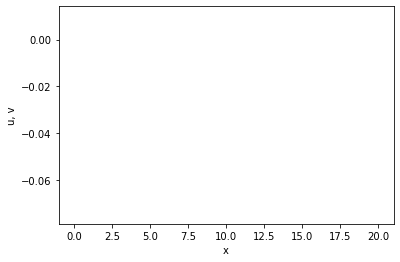

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 1.0
eps = 0.001
a = 0.125
Du = 1.0
Dv = 0.1
L = 20.0
T = 5.0
#Neumann境界条件(断熱) FitzHugh-Nagumo eq.
def f(u, v):
  return (u*(1.0-u)*(u-a)-v)/eps
def g(u, v):
  return u-gamma*v

dx = 0.1
dt = 0.01
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(dx*dx)
u = np.random.rand(Nt, Ns+1)*0.01
v = np.random.rand(Nt, Ns+1)*0.01

#計算行列
Au = np.eye(Ns)*(1+2*r*Du) - np.eye(Ns, k=1)*(r*Du)- np.eye(Ns, k=-1)*(r*Du)
Au[0, Ns-1] = -r*Du
Au[Ns-1, 0] = -r*Du
Av = np.eye(Ns)*(1+2*r*Dv) - np.eye(Ns, k=1)*(r*Dv)- np.eye(Ns, k=-1)*(r*Dv)
Av[0, Ns-1] = -r*Dv
Av[Ns-1, 0] = -r*Dv

#解を求める
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  bu = u[n, :Ns] + dt*f(u[n, :Ns], v[n, :Ns])
  u[n+1, :Ns] = dsolve.spsolve(Au, bu)
  u[n+1, Ns] = u[n+1, 0]

  bv = v[n, :Ns] + dt*g(u[n, :Ns], v[n, :Ns])
  v[n+1, :Ns] = dsolve.spsolve(Av, bv)
  v[n+1, Ns] = v[n+1, 0]

#可視化
import matplotlib.animation as animation
ims = []

fig = plt.figure()
ax = fig.add_subplot(111)
gx = np.arange(Ns+1)*dx

for n in range(Nt):
  im1 = ax.plot(gx, u[n, :], color="red")
  im2 = ax.plot(gx, v[n, :], color="green")
  #im_time = ax.text(0, 5.5, 'Time = {0:8.1f}[s]'.format(n*dt))
  ims.append(im1 + im2)

ax.set_xlabel('x')
ax.set_ylabel('u, v')
#ax.legend(loc='lower left')
#ax.set_aspect('equal')
#fig.colorbar(im_contour)
anm = animation.ArtistAnimation(fig, ims, interval=40)
anm.save("FitzHugh-Nagumo1dimPeriodic_Dv=01_initial=random.gif", writer="pillow")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


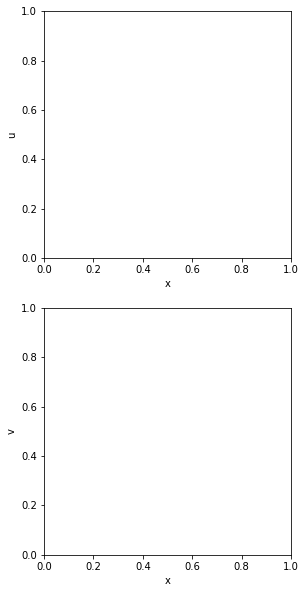

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 1.0
eps = 0.001
a = 0.125
Du = 1.0
Dv = 10.0
L = 1.0
T = 0.1
#Neumann境界条件(断熱) FitzHugh-Nagumo eq.
def f(u, v):
  return (u*(1.0-u)*(u-a)-v)/eps
def g(u, v):
  return u-gamma*v

dx = 0.01
dt = 0.0001
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(2*dx*dx)
u = np.zeros((Nt, Ns+1, Ns+1))
v = np.zeros((Nt, Ns+1, Ns+1))
#初期条件
for i in range(Ns+1):
  for j in range(Ns+1):
    x = i*dx
    y = j*dx
    u[0, i, j] = 0.01*np.exp(-100*((x-0.5)**2 + (y-0.5)**2))
    v[0, i, j] = 0.01*np.exp(-100*((x-0.5)**2 + (y-0.5)**2))



#計算行列
Au = np.eye(Ns+1)*(1+2*r*Du) - np.eye(Ns+1, k=1)*(r*Du)- np.eye(Ns+1, k=-1)*(r*Du)
Au[0, 0] *= 0.5
Au[Ns, Ns] *= 0.5
Av = np.eye(Ns+1)*(1+2*r*Dv) - np.eye(Ns+1, k=1)*(r*Dv)- np.eye(Ns+1, k=-1)*(r*Dv)
Av[0, 0] *= 0.5
Av[Ns, Ns] *= 0.5

#解を求める(ADI method)
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  u_dash = np.zeros((Ns+1, Ns+1))
  v_dash = np.zeros((Ns+1, Ns+1))
  if n % 2 == 0:
    for j in range(Ns+1):
      #First step
      if j==0:
        bu = u[n, :, 0] + Du*r*2*(u[n, :, 1] - u[n, :, 0]) + dt*0.5*f(u[n, :, 0], v[n, :, 0])
        bv = v[n, :, 0] + Dv*r*2*(v[n, :, 1] - v[n, :, 0]) + dt*0.5*g(u[n, :, 0], v[n, :, 0])

      elif j==Ns:
        bu = u[n, :, Ns] + Du*r*2*(u[n, :, Ns-1] - u[n, :, Ns]) + dt*0.5*f(u[n, :, Ns], v[n, :, Ns])
        bv = v[n, :, Ns] + Dv*r*2*(v[n, :, Ns-1] - v[n, :, Ns]) + dt*0.5*g(u[n, :, Ns], v[n, :, Ns])

      else:
        bu = u[n, :, j] + Du*r*(u[n, :, j+1]-2*u[n, :, j]+u[n, :, j-1]) + dt*0.5*f(u[n, :, j], v[n, :, j])
        bv = v[n, :, j] + Dv*r*(v[n, :, j+1]-2*v[n, :, j]+v[n, :, j-1]) + dt*0.5*g(u[n, :, j], v[n, :, j])

      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5
      u_dash[:, j]= dsolve.spsolve(Au, bu)
      v_dash[:, j] = dsolve.spsolve(Av, bv)

    #Second step
    for i in range(Ns+1):
      if i==0:
        bu = u_dash[0, :] + Du*r*2*(u_dash[1, :] - u_dash[0, :]) + dt*0.5*f(u_dash[0, :], v_dash[0, :])
        bv = v_dash[0, :] + Dv*r*2*(v_dash[1, :] - v_dash[0, :]) + dt*0.5*g(u_dash[0, :], v_dash[0, :])

      elif i==Ns:
        bu = u_dash[Ns, :] + Du*r*2*(u_dash[Ns-1, :] - u_dash[Ns, :]) + dt*0.5*f(u_dash[Ns, :], v_dash[Ns, :])
        bv = v_dash[Ns, :] + Dv*r*2*(v_dash[Ns-1, :] - v_dash[Ns, :]) + dt*0.5*g(u_dash[Ns, :], v_dash[Ns, :])

      else :
        bu = u_dash[i, :] + Du*r*(u_dash[i+1, :] - 2*u_dash[i, :] + u_dash[i-1, :]) + dt*0.5*f(u_dash[i, :], v_dash[i, :])
        bv = v_dash[i, :] + Dv*r*(v_dash[i+1, :] - 2*v_dash[i, :] + v_dash[i-1, :]) + dt*0.5*g(u_dash[i, :], v_dash[i, :])

      
      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5  
      u[n+1, i, :] = dsolve.spsolve(Au, bu)
      v[n+1, i, :] = dsolve.spsolve(Av, bv)

  if n % 2 == 1:
    for i in range(Ns+1):
      #First step
      if i==0:
        bu = u[n, 0, :] + Du*r*2*(u[n, 1, :] - u[n, 0, :]) + dt*0.5*f(u[n, 0, :], v[n, 0, :])
        bv = v[n, 0, :] + Dv*r*2*(v[n, 1, :] - v[n, 0, :]) + dt*0.5*g(u[n, 0, :], v[n, 0, :])

      elif i==Ns:
        bu = u[n, Ns, :] + Du*r*2*(u[n, Ns-1, :] - u[n, Ns, :]) + dt*0.5*f(u[n, Ns, :], v[n, Ns, :])
        bv = v[n, Ns, :] + Dv*r*2*(v[n, Ns-1, :] - v[n, Ns, :]) + dt*0.5*g(u[n, Ns, :], v[n, Ns, :])

      else:
        bu = u[n, i, :] + Du*r*(u[n, i+1, :] - 2*u[n, i, :] + u[n, i-1, :]) + dt*0.5*f(u[n, i, :], v[n, i, :])
        bv = v[n, i, :] + Dv*r*(v[n, i+1, :] - 2*v[n, i, :] + v[n, i-1, :]) + dt*0.5*g(u[n, i, :], v[n, i, :])
      

      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5
      u_dash[i, :]= dsolve.spsolve(Au, bu)
      v_dash[i, :] = dsolve.spsolve(Av, bv)

    #Second step
    for j in range(Ns+1):
      if j==0:
        bu = u_dash[:, 0] + Du*r*2*(u_dash[:, 1] - u_dash[:, 0]) + dt*0.5*f(u_dash[:, 0], v_dash[:, 0])
        bv = v_dash[:, 0] + Dv*r*2*(v_dash[:, 1] - v_dash[:, 0]) + dt*0.5*g(u_dash[:, 0], v_dash[:, 0])

      elif j==Ns:
        bu = u_dash[:, Ns] + Du*r*2*(u_dash[:, Ns-1] - u_dash[:, Ns]) + dt*0.5*f(u_dash[:, Ns], v_dash[:, Ns])
        bv = v_dash[:, Ns] + Dv*r*2*(v_dash[:, Ns-1] - v_dash[:, Ns]) + dt*0.5*g(u_dash[:, Ns], v_dash[:, Ns])

      else :
        bu = u_dash[:, j] + Du*r*(u_dash[:, j+1] - 2*u_dash[:, j] + u_dash[:, j-1]) + dt*0.5*f(u_dash[:, j], v_dash[:, j])
        bv = v_dash[:, j] + Dv*r*(v_dash[:, j+1] - 2*v_dash[:, j] + v_dash[:, j-1]) + dt*0.5*g(u_dash[:, j], v_dash[:, j])


      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5
      u[n+1, :, j] = dsolve.spsolve(Au, bu)
      v[n+1, :, j] = dsolve.spsolve(Av, bv)



#可視化
import matplotlib.animation as animation
ims = []
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

gx = np.arange(Ns+1)*dx
gy = np.arange(Ns+1)*dx
X, Y = np.meshgrid(gx, gy)

for n in range(Nt):
  im_contour1 = ax1.pcolormesh(X, Y, u[n, :, :].T, cmap='jet', vmin=u.min(), vmax=u.max(), shading='gouraud')
  im_contour2 = ax2.pcolormesh(X, Y, v[n, :, :].T, cmap='jet', vmin=v.min(), vmax=v.max(), shading='gouraud')
  im_time = ax1.text(0, 0, 'Time = {}[s]'.format(n*dt))
  ims.append([im_contour1] + [im_contour2] + [im_time])

ax1.set_xlabel('x')
ax1.set_ylabel('u')  
ax2.set_xlabel('x')
ax2.set_ylabel('v')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
#fig.colorbar(im_contour1)
#fig.colorbar(im_contour2)
anm = animation.ArtistAnimation(fig, ims, interval=5)
anm.save('FitzHugh-Nagumo2dimNeumann_Dv=10_gaussinitial.gif', writer='pillow')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


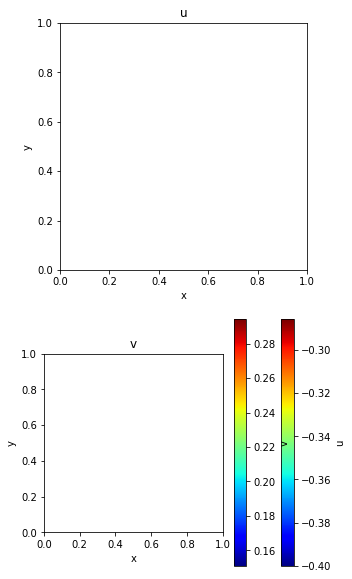

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 1.0
eps = 0.001
a = 0.125
Du = 1.0
Dv = 0.1
L = 1.0
T = 0.5
#周期境界条件 FitzHugh-Nagumo eq.
def f(u, v):
  return (u*(1.0-u)*(u-a)-v)/eps
def g(u, v):
  return u-gamma*v

dx = 0.01
dt = 0.0001
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(2*dx*dx)
#初期条件
u = np.random.rand(Nt, Ns+1, Ns+1)
v = np.random.rand(Nt, Ns+1, Ns+1)

#計算行列
Au = np.eye(Ns)*(1+2*r*Du) - np.eye(Ns, k=1)*(r*Du)- np.eye(Ns, k=-1)*(r*Du)
Au[0, Ns-1] = -Du*r
Au[Ns-1, 0] = -Du*r
Av = np.eye(Ns)*(1+2*r*Dv) - np.eye(Ns, k=1)*(r*Dv)- np.eye(Ns, k=-1)*(r*Dv)
Av[0, Ns-1] = -Dv*r
Av[Ns-1, 0] = -Dv*r

#解を求める(ADI method)
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  u_dash = np.zeros((Ns, Ns))
  v_dash = np.zeros((Ns, Ns))
  if n % 2 == 0:
    for j in range(Ns):
      #First step
      if j==0:
        bu = u[n, :Ns, 0] + Du*r*(u[n, :Ns, 1] - 2*u[n, :Ns, 0] + u[n, :Ns, Ns-1]) + dt*0.5*f(u[n, :Ns, 0], v[n, :Ns, 0])
        bv = v[n, :Ns, 0] + Dv*r*(v[n, :Ns, 1] - 2*v[n, :Ns, 0] + v[n, :Ns, Ns-1]) + dt*0.5*g(u[n, :Ns, 0], v[n, :Ns, 0])

      elif j==Ns-1:
        bu = u[n, :Ns, Ns-1] + Du*r*(u[n, :Ns, Ns-2] - 2*u[n, :Ns, Ns-1] + u[n, :Ns, 0]) + dt*0.5*f(u[n, :Ns, Ns-1], v[n, :Ns, Ns-1])
        bv = v[n, :Ns, Ns-1] + Dv*r*(v[n, :Ns, Ns-2] - 2*v[n, :Ns, Ns-1] + v[n, :Ns, 0]) + dt*0.5*g(u[n, :Ns, Ns-1], v[n, :Ns, Ns-1])

      else:
        bu = u[n, :Ns, j] + Du*r*(u[n, :Ns, j+1]-2*u[n, :Ns, j]+u[n, :Ns, j-1]) + dt*0.5*f(u[n, :Ns, j], v[n, :Ns, j])
        bv = v[n, :Ns, j] + Dv*r*(v[n, :Ns, j+1]-2*v[n, :Ns, j]+v[n, :Ns, j-1]) + dt*0.5*g(u[n, :Ns, j], v[n, :Ns, j])

      u_dash[:, j] = dsolve.spsolve(Au, bu)
      v_dash[:, j] = dsolve.spsolve(Av, bv)

    #Second step
    for i in range(Ns):
      if i==0:
        bu = u_dash[0, :] + Du*r*(u_dash[1, :] - 2*u_dash[0, :] + u_dash[Ns-1, :]) + dt*0.5*f(u_dash[0, :], v_dash[0, :])
        bv = v_dash[0, :] + Dv*r*(v_dash[1, :] - 2*v_dash[0, :] + v_dash[Ns-1, :]) + dt*0.5*g(u_dash[0, :], v_dash[0, :])

      elif i==Ns-1:
        bu = u_dash[Ns-1, :] + Du*r*(u_dash[Ns-2, :] - 2*u_dash[Ns-1, :] + u_dash[0, :]) + dt*0.5*f(u_dash[Ns-1, :], v_dash[Ns-1, :])
        bv = v_dash[Ns-1, :] + Dv*r*(v_dash[Ns-2, :] - 2*v_dash[Ns-1, :] + v_dash[0, :]) + dt*0.5*g(u_dash[Ns-1, :], v_dash[Ns-1, :])

      else :
        bu = u_dash[i, :] + Du*r*(u_dash[i+1, :] - 2*u_dash[i, :] + u_dash[i-1, :]) + dt*0.5*f(u_dash[i, :], v_dash[i, :])
        bv = v_dash[i, :] + Dv*r*(v_dash[i+1, :] - 2*v_dash[i, :] + v_dash[i-1, :]) + dt*0.5*g(u_dash[i, :], v_dash[i, :])
 
      u[n+1, i, : Ns] = dsolve.spsolve(Au, bu)
      v[n+1, i, : Ns] = dsolve.spsolve(Av, bv)
    u[n+1, :Ns, Ns] = u[n+1, :Ns, 0]
    u[n+1, Ns, :] = u[n+1, 0, :]
    v[n+1, :Ns, Ns] = v[n+1, :Ns, 0]
    v[n+1, Ns, :] = v[n+1, 0, :]

  if n % 2 == 1:
    for i in range(Ns):
      #First step
      if i==0:
        bu = u[n, 0, :Ns] + Du*r*(u[n, 1, :Ns] - 2*u[n, 0, :Ns] + u[n, Ns-1, :Ns]) + dt*0.5*f(u[n, 0, :Ns], v[n, 0, :Ns])
        bv = v[n, 0, :Ns] + Dv*r*(v[n, 1, :Ns] - 2*v[n, 0, :Ns] + v[n, Ns-1, :Ns]) + dt*0.5*g(u[n, 0, :Ns], v[n, 0, :Ns])

      elif i==Ns-1:
        bu = u[n, Ns-1, :Ns] + Du*r*(u[n, Ns-2, :Ns] - 2*u[n, Ns-1, :Ns] + u[n, 0, :Ns]) + dt*0.5*f(u[n, Ns-1, :Ns], v[n, Ns-1, :Ns])
        bv = v[n, Ns-1, :Ns] + Dv*r*(v[n, Ns-2, :Ns] - 2*v[n, Ns-1, :Ns] + v[n, 0, :Ns]) + dt*0.5*g(u[n, Ns-1, :Ns], v[n, Ns-1, :Ns])

      else:
        bu = u[n, i, :Ns] + Du*r*(u[n, i+1, :Ns] - 2*u[n, i, :Ns] + u[n, i-1, :Ns]) + dt*0.5*f(u[n, i, :Ns], v[n, i, :Ns])
        bv = v[n, i, :Ns] + Dv*r*(v[n, i+1, :Ns] - 2*v[n, i, :Ns] + v[n, i-1, :Ns]) + dt*0.5*g(u[n, i, :Ns], v[n, i, :Ns])
      
      u_dash[i, :] = dsolve.spsolve(Au, bu)
      v_dash[i, :] = dsolve.spsolve(Av, bv)

    #Second step
    for j in range(Ns):
      if j==0:
        bu = u_dash[:, 0] + Du*r*(u_dash[:, 1] - 2*u_dash[:, 0] + u_dash[:, Ns-1]) + dt*0.5*f(u_dash[:, 0], v_dash[:, 0])
        bv = v_dash[:, 0] + Dv*r*(v_dash[:, 1] - 2*v_dash[:, 0] + v_dash[:, Ns-1]) + dt*0.5*g(u_dash[:, 0], v_dash[:, 0])

      elif j==Ns-1:
        bu = u_dash[:, Ns-1] + Du*r*(u_dash[:, Ns-2] - 2*u_dash[:, Ns-1] + u_dash[:, 0]) + dt*0.5*f(u_dash[:, Ns-1], v_dash[:, Ns-1])
        bv = v_dash[:, Ns-1] + Dv*r*(v_dash[:, Ns-2] - 2*v_dash[:, Ns-1] + v_dash[:, 0]) + dt*0.5*g(u_dash[:, Ns-1], v_dash[:, Ns-1])

      else :
        bu = u_dash[:, j] + Du*r*(u_dash[:, j+1] - 2*u_dash[:, j] + u_dash[:, j-1]) + dt*0.5*f(u_dash[:, j], v_dash[:, j])
        bv = v_dash[:, j] + Dv*r*(v_dash[:, j+1] - 2*v_dash[:, j] + v_dash[:, j-1]) + dt*0.5*g(u_dash[:, j], v_dash[:, j])

      u[n+1, :Ns, j] = dsolve.spsolve(Au, bu)
      v[n+1, :Ns, j] = dsolve.spsolve(Av, bv)
    u[n+1, Ns, :Ns] = u[n+1, 0, :Ns]
    u[n+1, :, Ns] = u[n+1, :, 0]
    v[n+1, Ns, :Ns] = v[n+1, 0, :Ns]
    v[n+1, :, Ns] = v[n+1, :, 0]


#可視化
import matplotlib.animation as animation
ims = []
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

gx = np.arange(Ns+1)*dx
gy = np.arange(Ns+1)*dx
X, Y = np.meshgrid(gx, gy)

for n in range(Nt//2, Nt):
  im_contour1 = ax1.pcolormesh(X, Y, u[n, :, :].T, cmap='jet', vmin=u[Nt//2:].min(), vmax=u[Nt//2:].max(), shading='gouraud')
  im_contour2 = ax2.pcolormesh(X, Y, v[n, :, :].T, cmap='jet', vmin=v[Nt//2:].min(), vmax=v[Nt//2:].max(), shading='gouraud')
  im_time = ax1.text(0, 0, 'Time = {}[s]'.format(n*dt))
  ims.append([im_contour1] + [im_contour2] + [im_time])

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('u')  
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('v')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
fig.colorbar(im_contour1).set_label('u')
fig.colorbar(im_contour2).set_label('v')
anm = animation.ArtistAnimation(fig, ims, interval=1)
anm.save('FitzHugh-Nagumo2dimPeriodic_Dv=01_randomHalf_ver2.gif', writer='pillow')
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


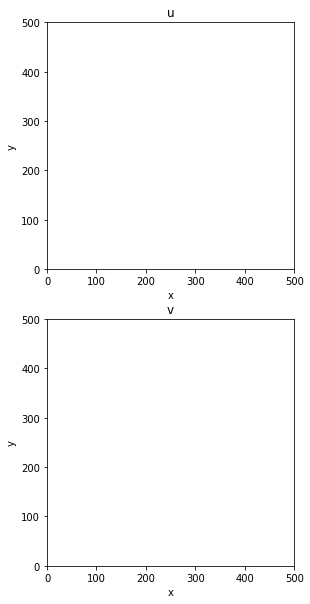

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = 0.49
b = 0.5
c = 0.5
d = 0.5
Du = 17.5
Dv = 218.75
L = 500.0
T = 100.0
#Neumann境界条件(断熱) activator-inhibitor system 4.73
def f(u, v):
  return a*u-b*v-u**3
def g(u, v):
  return c*u - d*v

dx = 1.0
dt = 0.1
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(2*dx*dx)
u = np.zeros((Nt, Ns+1, Ns+1))
v = np.zeros((Nt, Ns+1, Ns+1))
#初期条件
u = np.random.rand(Ns+1, Ns+1)
v = np.random.rand(Ns+1, Ns+1)


#計算行列
Au = np.eye(Ns+1)*(1+2*r*Du) - np.eye(Ns+1, k=1)*(r*Du)- np.eye(Ns+1, k=-1)*(r*Du)
Au[0, 0] *= 0.5
Au[Ns, Ns] *= 0.5
Av = np.eye(Ns+1)*(1+2*r*Dv) - np.eye(Ns+1, k=1)*(r*Dv)- np.eye(Ns+1, k=-1)*(r*Dv)
Av[0, 0] *= 0.5
Av[Ns, Ns] *= 0.5

#解を求める(ADI method)
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  u_dash = np.zeros((Ns+1, Ns+1))
  v_dash = np.zeros((Ns+1, Ns+1))
  if n % 2 == 0:
    for j in range(Ns+1):
      #First step
      if j==0:
        bu = u[n, :, 0] + Du*r*2*(u[n, :, 1] - u[n, :, 0]) + dt*0.5*f(u[n, :, 0], v[n, :, 0])
        bv = v[n, :, 0] + Dv*r*2*(v[n, :, 1] - v[n, :, 0]) + dt*0.5*g(u[n, :, 0], v[n, :, 0])

      elif j==Ns:
        bu = u[n, :, Ns] + Du*r*2*(u[n, :, Ns-1] - u[n, :, Ns]) + dt*0.5*f(u[n, :, Ns], v[n, :, Ns])
        bv = v[n, :, Ns] + Dv*r*2*(v[n, :, Ns-1] - v[n, :, Ns]) + dt*0.5*g(u[n, :, Ns], v[n, :, Ns])

      else:
        bu = u[n, :, j] + Du*r*(u[n, :, j+1]-2*u[n, :, j]+u[n, :, j-1]) + dt*0.5*f(u[n, :, j], v[n, :, j])
        bv = v[n, :, j] + Dv*r*(v[n, :, j+1]-2*v[n, :, j]+v[n, :, j-1]) + dt*0.5*g(u[n, :, j], v[n, :, j])

      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5
      u_dash[:, j]= dsolve.spsolve(Au, bu)
      v_dash[:, j] = dsolve.spsolve(Av, bv)

    #Second step
    for i in range(Ns+1):
      if i==0:
        bu = u_dash[0, :] + Du*r*2*(u_dash[1, :] - u_dash[0, :]) + dt*0.5*f(u_dash[0, :], v_dash[0, :])
        bv = v_dash[0, :] + Dv*r*2*(v_dash[1, :] - v_dash[0, :]) + dt*0.5*g(u_dash[0, :], v_dash[0, :])

      elif i==Ns:
        bu = u_dash[Ns, :] + Du*r*2*(u_dash[Ns-1, :] - u_dash[Ns, :]) + dt*0.5*f(u_dash[Ns, :], v_dash[Ns, :])
        bv = v_dash[Ns, :] + Dv*r*2*(v_dash[Ns-1, :] - v_dash[Ns, :]) + dt*0.5*g(u_dash[Ns, :], v_dash[Ns, :])

      else :
        bu = u_dash[i, :] + Du*r*(u_dash[i+1, :] - 2*u_dash[i, :] + u_dash[i-1, :]) + dt*0.5*f(u_dash[i, :], v_dash[i, :])
        bv = v_dash[i, :] + Dv*r*(v_dash[i+1, :] - 2*v_dash[i, :] + v_dash[i-1, :]) + dt*0.5*g(u_dash[i, :], v_dash[i, :])

      
      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5  
      u[n+1, i, :] = dsolve.spsolve(Au, bu)
      v[n+1, i, :] = dsolve.spsolve(Av, bv)

  if n % 2 == 1:
    for i in range(Ns+1):
      #First step
      if i==0:
        bu = u[n, 0, :] + Du*r*2*(u[n, 1, :] - u[n, 0, :]) + dt*0.5*f(u[n, 0, :], v[n, 0, :])
        bv = v[n, 0, :] + Dv*r*2*(v[n, 1, :] - v[n, 0, :]) + dt*0.5*g(u[n, 0, :], v[n, 0, :])

      elif i==Ns:
        bu = u[n, Ns, :] + Du*r*2*(u[n, Ns-1, :] - u[n, Ns, :]) + dt*0.5*f(u[n, Ns, :], v[n, Ns, :])
        bv = v[n, Ns, :] + Dv*r*2*(v[n, Ns-1, :] - v[n, Ns, :]) + dt*0.5*g(u[n, Ns, :], v[n, Ns, :])

      else:
        bu = u[n, i, :] + Du*r*(u[n, i+1, :] - 2*u[n, i, :] + u[n, i-1, :]) + dt*0.5*f(u[n, i, :], v[n, i, :])
        bv = v[n, i, :] + Dv*r*(v[n, i+1, :] - 2*v[n, i, :] + v[n, i-1, :]) + dt*0.5*g(u[n, i, :], v[n, i, :])
      

      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5
      u_dash[i, :]= dsolve.spsolve(Au, bu)
      v_dash[i, :] = dsolve.spsolve(Av, bv)

    #Second step
    for j in range(Ns+1):
      if j==0:
        bu = u_dash[:, 0] + Du*r*2*(u_dash[:, 1] - u_dash[:, 0]) + dt*0.5*f(u_dash[:, 0], v_dash[:, 0])
        bv = v_dash[:, 0] + Dv*r*2*(v_dash[:, 1] - v_dash[:, 0]) + dt*0.5*g(u_dash[:, 0], v_dash[:, 0])

      elif j==Ns:
        bu = u_dash[:, Ns] + Du*r*2*(u_dash[:, Ns-1] - u_dash[:, Ns]) + dt*0.5*f(u_dash[:, Ns], v_dash[:, Ns])
        bv = v_dash[:, Ns] + Dv*r*2*(v_dash[:, Ns-1] - v_dash[:, Ns]) + dt*0.5*g(u_dash[:, Ns], v_dash[:, Ns])

      else :
        bu = u_dash[:, j] + Du*r*(u_dash[:, j+1] - 2*u_dash[:, j] + u_dash[:, j-1]) + dt*0.5*f(u_dash[:, j], v_dash[:, j])
        bv = v_dash[:, j] + Dv*r*(v_dash[:, j+1] - 2*v_dash[:, j] + v_dash[:, j-1]) + dt*0.5*g(u_dash[:, j], v_dash[:, j])


      bu[0] *= 0.5
      bu[Ns] *= 0.5
      bv[0] *= 0.5
      bv[Ns] *= 0.5
      u[n+1, :, j] = dsolve.spsolve(Au, bu)
      v[n+1, :, j] = dsolve.spsolve(Av, bv)



#可視化
import matplotlib.animation as animation
ims = []
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

gx = np.arange(Ns+1)*dx
gy = np.arange(Ns+1)*dx
X, Y = np.meshgrid(gx, gy)

uma = u.max()
umi = u.min()
vma = v.max()
vmi = v.min()
for n in range(Nt):
  im_contour1 = ax1.pcolormesh(X, Y, u[n, :, :].T, cmap='jet', vmin=umi, vmax=uma, shading='gouraud')
  im_contour2 = ax2.pcolormesh(X, Y, v[n, :, :].T, cmap='jet', vmin=vmi, vmax=vma, shading='gouraud')
  im_time = ax1.text(0, 0, 'Time = {}[s]'.format(n*dt))
  ims.append([im_contour1] + [im_contour2] + [im_time])

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('u')  
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('v')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
#fig.colorbar(im_contour1)
#fig.colorbar(im_contour2)
anm = animation.ArtistAnimation(fig, ims, interval=10)
anm.save('Act-Inh2dimNeumannver2.gif', writer='pillow')
plt.show()

array([[-0.35096964, -0.35091728, -0.35072566, ..., -0.24984015,
        -0.2501462 , -0.25022828],
       [-0.35094471, -0.35089246, -0.35070027, ..., -0.24998883,
        -0.25029457, -0.25037718],
       [-0.35087465, -0.35082189, -0.3506289 , ..., -0.25043951,
        -0.25074677, -0.25082913],
       ...,
       [-0.2311789 , -0.23127138, -0.23151423, ..., -0.31590198,
        -0.31609173, -0.31617506],
       [-0.23093526, -0.23102851, -0.23127211, ..., -0.31567692,
        -0.31586667, -0.31595028],
       [-0.23084711, -0.23094025, -0.23118465, ..., -0.3156068 ,
        -0.31579682, -0.31588016]])